<a href="https://colab.research.google.com/github/sarinananya/YBI_MLmodels/blob/main/3_incomeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages and dataset**

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv")

**Exploring the data**

In [ ]:
df.head(5)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [ ]:
print(df.columns)
len(df.columns)

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')


10

from the given dataset we can observe that 
1. Income is the **dependent variable** and age, gender, WorkingClass, Education,MaritalStatus, Occupation	Relationship, Race and NativeCountry are **independent variables**
2. The target variable i.e. income is either greater than 50k or less than 50k which implies that this is a binary classification problem

In [ ]:
df.info()
#observation- data set has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [ ]:
#df.shape
#df.describe


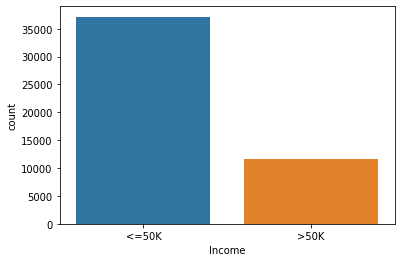

In [ ]:
import seaborn as sns
sns.countplot(x='Income',data=df)

In [ ]:
df['Income'].value_counts()

<=50K    37155
>50K     11687
Name: Income, dtype: int64

In [ ]:
print(f'<=50k: {round(37155/48842*100,2)} %')
print(f'>50k: {round(11687/48842*100,2)} %')

<=50k: 76.07 %
>50k: 23.93 %


**feature engineering**

In [ ]:
df.isnull().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

In [ ]:
#there is only one numerical value as of now i.e. age
numerical= df['Age']
print(len(df['Age'].unique()))
df['Age']=np.log(df['Age'])
#age has continuous values(not discrete)

74


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#string values
categorical= {i for i in df.columns if df[i].dtypes==object}

In [ ]:
for feature in categorical:
  print(f"{feature}: {len(df[feature].unique())}")

Income: 2
Gender: 2
NativeCountry: 42
Education: 16
Relationship: 6
MaritalStatus: 7
Occupation: 15
WorkingClass: 9
Race: 5


In [ ]:
#checking for the percentage of missing values(if any) in the data
for feature in categorical:
  print(df[feature].value_counts())
  print("\n \n")

0    37155
1    11687
Name: Income, dtype: int64

 

1    32650
0    16192
Name: Gender, dtype: int64

 

38    44689
25      951
29      295
10      206
32      184
1       182
7       155
18      151
4       138
8       127
2       122
34      115
22      106
21      105
5       103
23       92
12       88
30       87
39       86
3        85
13       75
31       67
35       65
19       59
11       49
26       49
28       46
6        45
9        38
20       37
16       30
36       30
0        28
37       27
40       23
27       23
24       23
33       21
15       20
17       19
14        1
Name: NativeCountry, dtype: int64

 

2    15784
4    15374
0     8025
5     6408
3     2657
1      594
Name: Education, dtype: int64

 

0    19716
1    12583
3     7581
4     5125
5     2331
2     1506
Name: Relationship, dtype: int64

 

0    48842
Name: MaritalStatus, dtype: int64

 

9     6172
2     6112
3     6086
0     5611
12    5504
7     4923
6     3022
10    2809
14    2355
5     2072
4 

from the above output we can observe that there are missing values in fields of **occupation** and **WorkingClass**, so lets 
**handle the missing values**. we will replace the **?** with **mode value**

In [ ]:
df["WorkingClass"]= df["WorkingClass"].str.replace('?','Private')
df["Occupation"]= df["Occupation"].str.replace('?', 'Prof-specialty ')
df['NativeCountry']=df['NativeCountry'].str.replace('?','United-States')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#the data in education field can be sorted by putting people from all schooling levels under same category
df['Education'].replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool'],'school', inplace=True)
df['Education'].replace(['Assoc-voc','Assoc-acdm','Some-college','Prof-school'],'higher', inplace=True)

In [ ]:
#income column
df['Income'].replace({ "<=50K":0, ">50K":1}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df= df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,8,1,3,5,0,6,3,2,38,0
1,21,1,3,2,0,4,0,4,38,0
2,11,1,1,4,0,11,0,4,38,1
3,27,1,3,4,0,6,0,2,38,1
4,1,0,3,4,0,10,3,4,38,0


In [ ]:
df.drop("MaritalStatus",axis=1,inplace=True)

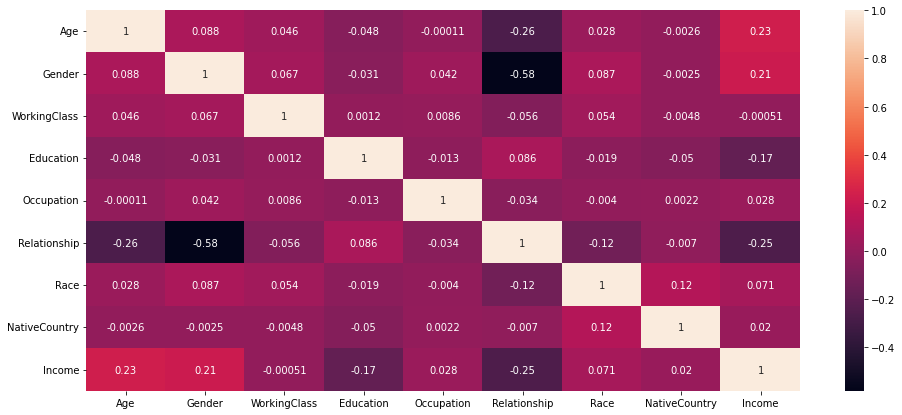

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(), annot=True)

from the above heatmap we can observe tha features like WorkingClass, Race do not have much impact on Income

**Train Test Split**

In [ ]:
X= df[['Age','Gender','WorkingClass','Education','Occupation','Relationship','Race','NativeCountry']].values
y= df['Income'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Now we will try to train our data with different techniques**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
prediction= lr.predict(X_test)
accuracy_score(y_test,prediction)

0.7646109939198412

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     12218
           1       0.41      0.74      0.53      3900

    accuracy                           0.68     16118
   macro avg       0.65      0.70      0.64     16118
weighted avg       0.77      0.68      0.70     16118

